# New Section

In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize 

import re
import warnings
warnings.filterwarnings("ignore")

In [4]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import os
import time
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA/BAAD16DATASET")
!ls

Dataset1.csv  Dataset2.csv


In [32]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("Dataset*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
                     label                                               text  \
0      shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1            humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2                 shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3            humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4            humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   
...                    ...                                                ...   
17961            shordindu  করিয়া সহজভাবে বলিল—ঘোড়া দুটিকে বৰ্গা খুলিয়া ছা...   
17962  shunil_gongopaddhay  না। আমরা সবাই থোড়া কুচ সাবক্রিপশান দিয়ে মেয়েটা...   
17963  shunil_gongopaddhay  কাকাবাবু, আমি আগে কখনও অজ্ঞান হইনি। নিজের কাছে...   
17964   nihar_ronjon_gupta  মধ্যে প্রবেশ করলেন। প্রথমেই ওরা সুশান্ত মল্লিক...   
17965        humayun_ahmed  আপনার অফিস?

In [33]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [10]:
#data = pd.read_csv('Data_samitdata.csv').apply(lambda x: x.astype(str).str.lower())

In [34]:
data.drop_duplicates(keep=False, inplace=True)

In [12]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 23.9 MB 644 kB/s 
     |████████████████████████████████| 1.3 MB 49.8 MB/s 
     |████████████████████████████████| 965 kB 53.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [35]:
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['text'].apply(lambda x:remove_punctuation(x))
data.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

   is_valid                                          clean_msg  
0     False  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...  
1     False  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...  
2     False  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...  
3     False  বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা টা...  
4     False  হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যেন...

In [36]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [37]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

In [38]:
stopwords = pd.read_csv('Stopwords.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))


#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in set_stop]
    return output

#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [39]:
data.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

   is_valid                                          clean_msg  \
0     False  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1     False  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2     False  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3     False  বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা টা...   
4     False  হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যেন...   

                                           msg_lower  \
0  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3  বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা টা...   
4  হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যেন...   

                                        msg_tokenied  \
0  [থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন ম...   
1  [এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনি...   
2  [হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে ...   
3  [বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা ট...   
4  [হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                        no_stopwords  
0  [থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন ম...  
1  [এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনি...  
2  [হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে ...  
3  [বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা ট...  
4  [হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...

In [40]:
import re
regex = re.compile(r'<[^>]+>')
def remove_html(text):
    return regex.sub('', text)

#storing the puntuation free text
data['clean_msg']= data['text'].apply(lambda x:remove_html(x))
data.head()



label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

   is_valid                                          clean_msg  \
0     False  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1     False  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2     False  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3     False  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4     False  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                           msg_lower  \
0  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3  বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা টা...   
4  হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যেন...   

                                        msg_tokenied  \
0  [থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন ম...   
1  [এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনি...   
2  [হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে ...   
3  [বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা ট...   
4  [হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                        no_stopwords  
0  [থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন ম...  
1  [এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনি...  
2  [হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে ...  
3  [বললাম আপনি ওর গায়ে হাত দিলেন কেন ষণ্ডাগণ্ডা ট...  
4  [হত আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...

In [15]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values


import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [41]:
X = data['text'].values

In [42]:
Y= pd.get_dummies(data['label'].values)

In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state=42) # this is random splitting
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33,random_state=42) # this is random splitting

In [43]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=42) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.1,random_state=42) # this is random splitting

In [44]:
#from nltk.tokenize import word_tokenize
#import nltk
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

def create_corpus(df):
    corpus = []  
    for text in X_train:
        words = [word.lower() for word in bnltk.word_tokenize(text)]
        #words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus    

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [45]:
#import nltk
#nltk.download('punkt')
corpus = create_corpus(X_train)

In [46]:
corpus[0]

['হিমালয়-কুক্ষিস্থিত',
 '।',
 'ঈগল',
 'পাখির',
 'বাসা',
 'বলিয়া',
 'ভ্রম',
 'হয়',
 '।',
 'তখনও',
 'বরফের',
 'এলাকায়',
 'আসিয়া',
 'পৌঁছাই',
 'নাই',
 ';',
 'কিন্তু',
 'সম্মুখেই',
 'হিমাদ্রির',
 'তুষার',
 'শুভ্ৰ',
 'দেহ',
 'আকাশের',
 'একটা',
 'দিক',
 'আড়াল',
 'করিয়া',
 'রাখিয়াছে',
 '।',
 'আশেপাশে',
 'পিছনে',
 'চারিদিকেই',
 'নগ্ন',
 'পাহাড়',
 ',',
 'পায়ের',
 'তলায়',
 'পাহাড়ী',
 'কাঁকর',
 'ও',
 'উপলখণ্ড',
 '।',
 'এই',
 'উপলাকীর্ণ',
 'কঠিন',
 'ভূমি',
 'চিরিয়া',
 'তন্ত্রী',
 'উপলা',
 'নদী',
 'খরধারে',
 'নিম্নাভিমুখে',
 'ছুটিয়া',
 'চলিয়াছে',
 '।',
 'আকাশে',
 'বাতাসে',
 'একটা',
 'জমাট',
 'শীতলতা',
 '।',
 'আমরা',
 'তিন',
 'জন—আমি',
 ',',
 'ভিক্ষু',
 'অভিরাম',
 'ও',
 'একজন',
 'ভুটিয়া',
 'পদপ্রদর্শক—গ্রামের',
 'নিকটবর্তী',
 'হইতেই',
 'গ্রামের',
 'সমস্ত',
 'স্ত্রীপুরুষ',
 'বালকবালিকা',
 'আসিয়া',
 'আমাদের',
 'ঘিরিয়া',
 'দাঁড়াইল',
 '।',
 'বহির্জগতের',
 'মানুষ',
 'এখানে',
 'কখনও',
 'আসে',
 'না',
 ';',
 'ইহারা',
 'সুবর্তুল',
 'চক্ষু',
 'বিস্ফারিত',
 'করিয়া',
 'আমাদের',
 'নিরীক্ষণ',
 'করিতে',
 'क्नांकि

In [47]:
num_words = len(corpus)
print(num_words)

16169


In [48]:
#max number of words in a seuence
max_length =500

In [49]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [50]:
word_index = tokenizer.word_index
print(len(word_index))

431899


In [51]:
word_index

{'না।': 1,
 'না': 2,
 'করে': 3,
 'আমি': 4,
 'সে': 5,
 'আমার': 6,
 'তার': 7,
 'আর': 8,
 'এই': 9,
 'একটা': 10,
 'কি': 11,
 'যে': 12,
 'কথা': 13,
 'কিন্তু': 14,
 'বলল': 15,
 'তো': 16,
 'মনে': 17,
 'থেকে': 18,
 'সঙ্গে': 19,
 'কী': 20,
 'হয়ে': 21,
 'কিছু': 22,
 'তুমি': 23,
 'হয়': 24,
 'বললেন': 25,
 'নিয়ে': 26,
 'এক': 27,
 'বলে': 28,
 'করতে': 29,
 'দিয়ে': 30,
 'তিনি': 31,
 'তোমার': 32,
 'সেই': 33,
 'এ': 34,
 'করিয়া': 35,
 'কেন': 36,
 'তা': 37,
 'আছে': 38,
 'ও': 39,
 'আছে।': 40,
 'দিকে': 41,
 'এবং': 42,
 'এখন': 43,
 'কাছে': 44,
 'আপনি': 45,
 'খুব': 46,
 'নেই।': 47,
 'যেন': 48,
 'হবে': 49,
 'মধ্যে': 50,
 'একটু': 51,
 'আমাকে': 52,
 'তাহার': 53,
 'তখন': 54,
 'সব': 55,
 'যদি': 56,
 'আপনার': 57,
 'কোনো': 58,
 'আমাদের': 59,
 'আবার': 60,
 'হইয়া': 61,
 'ছিল': 62,
 'সময়': 63,
 'বড়': 64,
 'ঠিক': 65,
 'গেল।': 66,
 'আজ': 67,
 'চলে': 68,
 'এসে': 69,
 'তাকে': 70,
 'কেউ': 71,
 'একটি': 72,
 'আমরা': 73,
 'হাত': 74,
 'হবে।': 75,
 'অনেক': 76,
 'তাই': 77,
 'বসে': 78,
 'করা': 79,
 'জন্য': 80,
 'মা': 81,
 'যায়': 8

In [52]:
train_sequences =  tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

In [54]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

In [55]:
print(X_train[0])
print(train_sequences[0])

হিমালয়-কুক্ষিস্থিত। ঈগল পাখির বাসা বলিয়া ভ্রম হয়। তখনও বরফের এলাকায় আসিয়া পৌঁছাই নাই; কিন্তু সম্মুখেই হিমাদ্রির তুষার শুভ্ৰ দেহ আকাশের একটা দিক আড়াল করিয়া রাখিয়াছে। আশেপাশে পিছনে চারিদিকেই নগ্ন পাহাড়, পায়ের তলায় পাহাড়ী কাঁকর ও উপলখণ্ড। এই উপলাকীর্ণ কঠিন ভূমি চিরিয়া তন্ত্রী উপলা নদী খরধারে নিম্নাভিমুখে ছুটিয়া চলিয়াছে। আকাশে বাতাসে একটা জমাট শীতলতা। আমরা তিন জন—আমি, ভিক্ষু অভিরাম ও একজন ভুটিয়া পদপ্রদর্শক—গ্রামের নিকটবর্তী হইতেই গ্রামের সমস্ত স্ত্রীপুরুষ বালকবালিকা আসিয়া আমাদের ঘিরিয়া দাঁড়াইল। বহির্জগতের মানুষ এখানে কখনও আসে না; ইহারা সুবর্তুল চক্ষু বিস্ফারিত করিয়া আমাদের নিরীক্ষণ করিতে क्नांकिक। চেহারা দেখিয়া মনে হইল—ইহারা লেপচা কিংবা ভূটানী। আর্য রক্তের সংমিশ্রণও সামান্য আছে; দুই-একটা খড়েগির মতো তীক্ষ্ণ নাক চোখে পড়িল। এইরূপ খড়গ-নাসিক একজন প্রৌঢ়াগোছের লোক আমাদের দিকে অগ্রসর হইয়া আসিয়া নিজ আমরা সরলভাবে আমাদের উদ্দেশ্য ব্যক্ত করিলম। শুনিয়া লোকটির চোখে মুখে প্রথমে বিস্ময়, তারপর প্রবল কৌতূহল ফুটিয়া উঠিল। সে আমাদের আহ্বান করিয়া গ্রামে লইয়া চলিল। মিছিল করিয়া আমরা অগ্রসর হইলাম। অগ্ৰে মোড়ল, তাহ

In [ ]:
word_index["বাংলাদেশ"]

In [ ]:
print(f"shape of train {train_padded.shape}")

shape of train (8064, 300)


In [ ]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (8064, 16)


In [56]:
reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

In [57]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [58]:
decode(train_sequences[0])

'হিমালয় পাখির বাসা বলিয়া ভ্রম হয়। তখনও বরফের এলাকায় আসিয়া নাই কিন্তু সম্মুখেই তুষার শুভ্ৰ দেহ আকাশের একটা দিক আড়াল করিয়া রাখিয়াছে। আশেপাশে পিছনে নগ্ন পাহাড় পায়ের তলায় ও এই কঠিন ভূমি নদী ছুটিয়া চলিয়াছে। আকাশে বাতাসে একটা জমাট আমরা তিন ভিক্ষু অভিরাম ও একজন নিকটবর্তী হইতেই গ্রামের সমস্ত আসিয়া আমাদের ঘিরিয়া দাঁড়াইল। মানুষ এখানে কখনও আসে না ইহারা চক্ষু বিস্ফারিত করিয়া আমাদের নিরীক্ষণ করিতে চেহারা দেখিয়া মনে কিংবা আর্য রক্তের সামান্য আছে দুই একটা মতো তীক্ষ্ণ নাক চোখে পড়িল। এইরূপ একজন লোক আমাদের দিকে অগ্রসর হইয়া আসিয়া নিজ আমরা আমাদের উদ্দেশ্য ব্যক্ত শুনিয়া লোকটির চোখে মুখে প্রথমে বিস্ময় তারপর প্রবল কৌতূহল ফুটিয়া উঠিল। সে আমাদের আহ্বান করিয়া গ্রামে লইয়া চলিল। মিছিল করিয়া আমরা অগ্রসর হইলাম। মোড়ল তাহার পিছনে আমরা তিন জন ও গ্রামের একটি কুটিরের মধ্যে লইয়া গিয়া মোড়ল আমাদের আমরা ক্লান্ত ও দেখিয়া দ্রব্য আনিয়া করিল। অতঃপর তৃপ্ত ও হইয়া বাক্যালাপ আরম্ভ সূর্য তখন পাহাড়ের আড়ালে ঢাকা পড়িয়াছে হিমালয়ের সুদীর্ঘ সন্ধ্যা যেন স্বচ্ছ বাতাসে আরম্ভ করিয়াছে। মোড়ল বলিল গ্রাম হইতে চার ক্রোশ উত্তরে নদীর ঐ হইতেই নদী ঐ স

In [59]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [60]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (1797, 500)
shape of testLlabel (1797, 16)


In [61]:
embedding_dict = {}
#with open("bn_glove.39M.100d.txt", "r") as f:
with open("bn_glove.39M.300d.txt", "r") as f:  
    for line in f:
        values = line.split() 
        word = values[0]
        vectors = np.asarray(values[1:], "float32")  
        embedding_dict[word] = vectors
f.close()        

In [62]:
embedding_dict

Output hidden; open in https://colab.research.google.com to view.

In [63]:
#create embedding matrix

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,300))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.096394  ,  0.38893801,  0.35681501, ..., -0.02118   ,
        -0.21176399, -0.42254901],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
word_index['অফিস']

318

In [ ]:
embedding_dict.get("অফিস")

In [ ]:
(embedding_matrix[929] == embedding_dict.get("অফিস")).all()

False

In [65]:
#baseline model with glove

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.initializers import Constant
from keras.models import Sequential

model = Sequential()

model.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= True,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [66]:
# try using different optimizers and different optimizer configs
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          129570000 
                                                                 
 bidirectional (Bidirectiona  (None, 64)               85248     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
Total params: 129,656,288
Trainable params: 129,656,288
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
#dropoutrte=0.5 and lstm(100) (30-70 SPLIT)
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=model.fit(train_padded,y_train,epochs=20,batch_size=128,validation_data=(test_padded,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/20
127/127 - 181s - loss: 2.2928 - accuracy: 0.2865 - val_loss: 1.7169 - val_accuracy: 0.4179 - 181s/epoch - 1s/step
Epoch 2/20
127/127 - 163s - loss: 1.6106 - accuracy: 0.4729 - val_loss: 1.1962 - val_accuracy: 0.6249 - 163s/epoch - 1s/step
Epoch 3/20
127/127 - 161s - loss: 1.2050 - accuracy: 0.6148 - val_loss: 1.2188 - val_accuracy: 0.5982 - 161s/epoch - 1s/step
Epoch 4/20
127/127 - 162s - loss: 0.7906 - accuracy: 0.7676 - val_loss: 0.5506 - val_accuracy: 0.8587 - 162s/epoch - 1s/step
Epoch 5/20
127/127 - 161s - loss: 0.5085 - accuracy: 0.8626 - val_loss: 0.3154 - val_accuracy: 0.9193 - 161s/epoch - 1s/step
Epoch 6/20
127/127 - 161s - loss: 0.3288 - accuracy: 0.9162 - val_loss: 0.1901 - val_accuracy: 0.9527 - 161s/epoch - 1s/step
Epoch 7/20
127/127 - 160s - loss: 0.2058 - accuracy: 0.9532 - val_loss: 0.1454 - val_accuracy: 0.9627 - 160s/epoch - 1s/step
Epoch 8/20
127/127 - 160s - loss: 0.1248 - accuracy: 0.9728 - val_loss: 0.2051 - val_accuracy: 0.9477 - 160s/epoch - 1s/step


BILSTM MODEL(32)

In [68]:
# evaluate the model
_, train_acc = model.evaluate(train_padded, y_train, verbose=0)
_, test_acc = model.evaluate(test_padded, y_test, verbose=0)

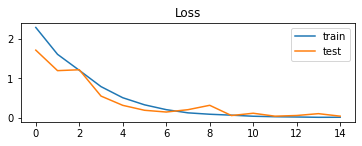

In [71]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

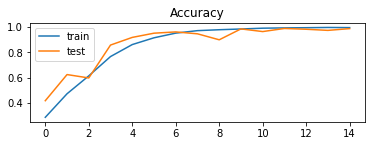

In [73]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [74]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)
    

In [75]:
rounded_predictions = np.argmax(predictions, axis=1)

#for i in rounded_predictions:
   # print(i)

In [76]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_test

In [78]:
for i in y_test:
    print(i)

MZI
bongkim
humayun_ahmed
manik_bandhopaddhay
nazrul
nihar_ronjon_gupta
robindronath
shirshendu
shomresh
shordindu
shorotchandra
shottojit_roy
shunil_gongopaddhay
tarashonkor
toslima_nasrin
zahir_rayhan


In [79]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
cm_plot_labels = [ 'MZI',   'bongkim',  'humayun_ahmed',  'manik_bandhopaddhay',  'nazrul',  'nihar_ronjon_gupta',  'robindronath', 'shirshendu', 'shomresh',  'shordindu', 'shorotchandra',  'shottojit_roy',  'shunil_gongopaddhay',  'tarashonkor',  'toslima_nasrin',  'zahir_rayhan']         

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, target_names=cm_plot_labels ))

                     precision    recall  f1-score   support

                MZI       0.99      1.00      1.00       113
            bongkim       1.00      0.96      0.98        50
      humayun_ahmed       1.00      0.99      1.00       461
manik_bandhopaddhay       0.95      0.98      0.96        42
             nazrul       0.89      0.96      0.92        25
 nihar_ronjon_gupta       0.98      0.98      0.98        50
       robindronath       0.98      0.97      0.97       123
         shirshendu       1.00      0.99      1.00       106
           shomresh       0.99      1.00      1.00       156
          shordindu       1.00      0.96      0.98        73
      shorotchandra       0.99      0.99      0.99       136
      shottojit_roy       0.99      1.00      0.99        87
shunil_gongopaddhay       1.00      1.00      1.00       207
        tarashonkor       0.96      0.99      0.97        74
     toslima_nasrin       0.96      0.97      0.97        75
       zahir_rayhan    

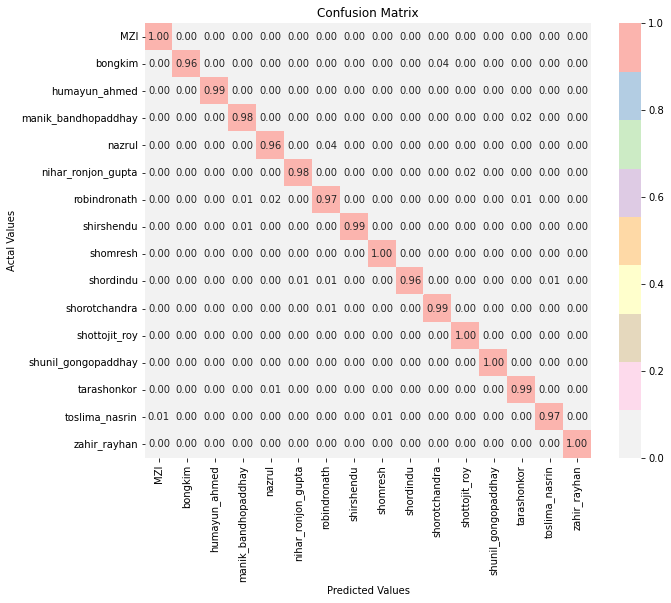

In [84]:
# Random Forest Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, model_prediction)
cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['MZI',   'bongkim',  'humayun_ahmed',  'manik_bandhopaddhay',  'nazrul',  'nihar_ronjon_gupta',  'robindronath', 'shirshendu', 'shomresh',  'shordindu', 'shorotchandra',  'shottojit_roy',  'shunil_gongopaddhay',  'tarashonkor',  'toslima_nasrin',  'zahir_rayhan'],

                     columns = ['MZI',   'bongkim',  'humayun_ahmed',  'manik_bandhopaddhay',  'nazrul',  'nihar_ronjon_gupta',  'robindronath', 'shirshendu', 'shomresh',  'shordindu', 'shorotchandra',  'shottojit_roy',  'shunil_gongopaddhay',  'tarashonkor',  'toslima_nasrin',  'zahir_rayhan'])


#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()